In [1]:
pip install tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 554.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 43.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 81.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 71.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 100.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.0 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.models import load_model

# Step 1: Load your model
#model = load_model('alzheimer_cnn_augmented_model-Copy1.keras')


In [26]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("lukechugh/best-alzheimer-mri-dataset-99-accuracy")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy/versions/1


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import os
base_dir = "Combined Dataset"
test_dir = os.path.join(base_dir, "test")

#Create an ImageDataGenerator for normalization
datagen = ImageDataGenerator(rescale=1./255)

#Point the generator to your "test" folder
test_generator = datagen.flow_from_directory(
    directory=test_dir,
    target_size=(128, 128),
    batch_size=32,
    shuffle=False,
    class_mode='categorical'
)

#CNN Validation#

In [ ]:
#Load pre-trained model
model = load_model("alzheimer_cnn_augmented_model-Copy1.keras")

#Evaluate the model on the test set
results = model.evaluate(test_generator, verbose=1)
print(f"Test Loss: {results[0]:.2f}")
print(f"Test Accuracy: {results[1]:.2f}")



Found 1279 images belonging to 4 classes.
 1/40 ━━━━━━━━━━━━━━━━━━━━ 5s 149ms/step - accuracy: 1.0000 - loss: 0.0370

/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.9955 - loss: 0.0336
Test Loss: 0.05
Test Accuracy: 0.99


In [ ]:
import numpy as np
from sklearn.metrics import classification_report

# Get predictions
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)

# True labels
true_classes = test_generator.classes

# Class labels
class_labels = list(test_generator.class_indices.keys())

# Classification report
print(classification_report(true_classes, predicted_classes, target_names=class_labels))


40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step
                      precision    recall  f1-score   support

     Mild Impairment       0.99      1.00      1.00       179
 Moderate Impairment       1.00      1.00      1.00        12
       No Impairment       0.99      0.99      0.99       640
Very Mild Impairment       0.99      0.98      0.99       448

            accuracy                           0.99      1279
           macro avg       0.99      0.99      0.99      1279
        weighted avg       0.99      0.99      0.99      1279



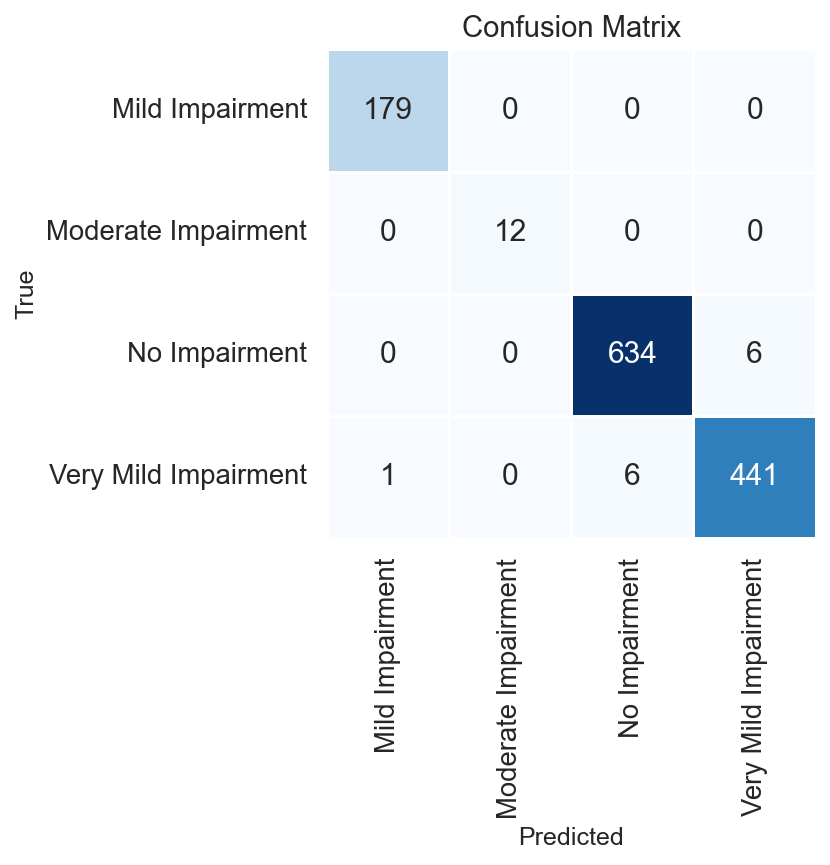

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Increase the default DPI for better resolution
plt.rcParams['figure.dpi'] = 150

# Increase the font size and apply a clean style
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Create a larger figure
plt.figure(figsize=(8, 6))

# Draw a heatmap
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    xticklabels=class_labels,
    yticklabels=class_labels,
    square=True,
    linewidths=0.5,
    cbar=False  # Disable the color bar
)

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


In [4]:
#####FOR SAMIA TO LOAD THE DATASET#############
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
import os

dataset_dir = os.path.join(path, "Combined Dataset")
test_dir = os.path.join(dataset_dir, "test")

Found 1279 images belonging to 4 classes.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Logistic Regression Validation#

In [6]:
import joblib

In [27]:
print(test_dir)
classes = os.listdir(test_dir)
print(classes)


/root/.cache/kagglehub/datasets/lukechugh/best-alzheimer-mri-dataset-99-accuracy/versions/1/Combined Dataset/test
['Very Mild Impairment', 'No Impairment', 'Moderate Impairment', 'Mild Impairment']


In [13]:
pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 MB 19.2 MB/s eta 0:00:00


In [49]:
import cv2
import numpy as np

xtest = []
ytest = []

class_mapping = {}
for label, cls in enumerate(classes):
    class_path = os.path.join(test_dir, cls)
    class_mapping[label] = cls

    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = cv2.imread(img_path)  # Load the image
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        xtest.append(img.flatten())
        ytest.append(label)

X_test = np.array(xtest)
y_test = np.array(ytest)

print("Loaded", len(X_test), "test images")
#this shows how the labels in the validation set are arranged
print(class_mapping)

Loaded 1279 test images
{0: 'Very Mild Impairment', 1: 'No Impairment', 2: 'Moderate Impairment', 3: 'Mild Impairment'}


In [75]:
#Load pre-trained model
model = joblib.load('/content/drive/MyDrive/log_reg.pkl')

import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
from collections import Counter
print("y_test distribution:", Counter(y_test))
print("mapped_ypred distribution:", Counter(mapped_ypred))
# labels in the training data - main_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
# labels in val data {0: 'Very Mild Impairment', 1: 'No Impairment', 2: 'Moderate Impairment', 3: 'Mild Impairment'}
# so mapping is 0 -> 3, 1-> 2, 2-> 1, 3-> 0
mapping = {0: 3, 1: 2, 2: 1, 3: 0}
mapped_ytest = [mapping[x] for x in y_test]

accuracy = accuracy_score(mapped_ytest, y_pred)

print("Test Accuracy:", accuracy)

y_test distribution: Counter({np.int64(1): 640, np.int64(0): 448, np.int64(3): 179, np.int64(2): 12})
mapped_ypred distribution: Counter({1: 650, 0: 435, 3: 182, 2: 12})
Test Accuracy: 0.9757623143080532


In [77]:
# Classification report
class_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
print(classification_report(mapped_ytest, y_pred, target_names=class_labels))

                    precision    recall  f1-score   support

     Mild_Demented       0.97      0.98      0.98       179
 Moderate_Demented       1.00      1.00      1.00        12
      Non_Demented       0.97      0.99      0.98       640
Very_Mild_Demented       0.98      0.96      0.97       448

          accuracy                           0.98      1279
         macro avg       0.98      0.98      0.98      1279
      weighted avg       0.98      0.98      0.98      1279



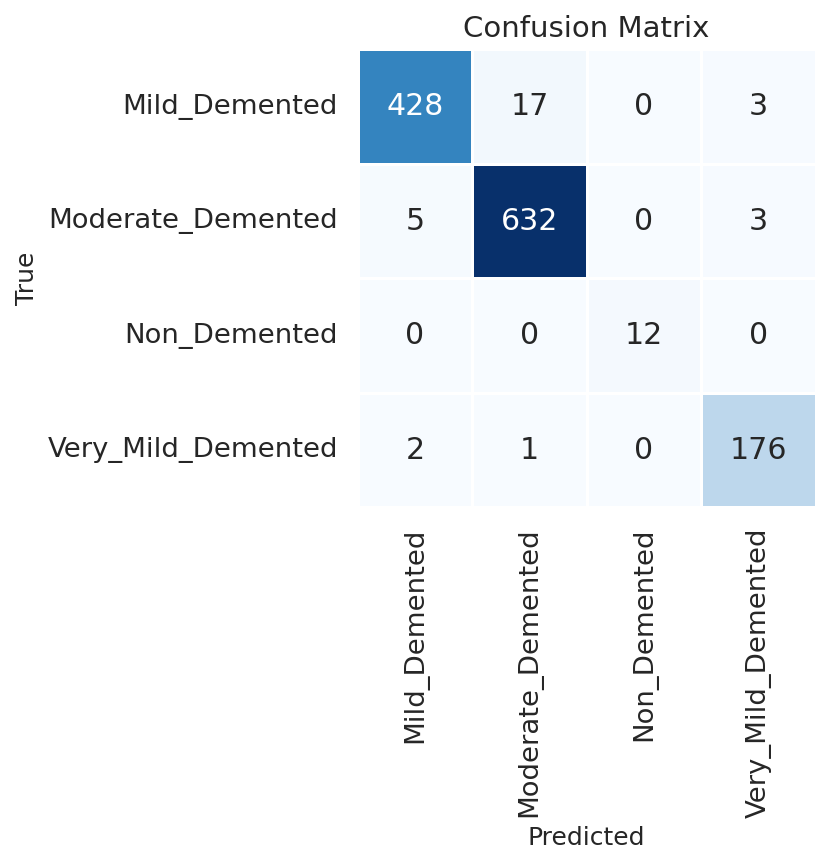

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Increase the default DPI for better resolution
plt.rcParams['figure.dpi'] = 150

# Increase the font size and apply a clean style
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Compute confusion matrix
cm = confusion_matrix(mapped_ytest, y_pred)

# Create a larger figure
plt.figure(figsize=(8, 6))

# Draw a heatmap
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    xticklabels=class_labels,
    yticklabels=class_labels,
    square=True,
    linewidths=0.5,
    cbar=False  # Disable the color bar
)

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


#Naive Bayes Validation#

In [78]:
#Load pre-trained model
model = joblib.load('/content/drive/MyDrive/gauss_nb.pkl')

import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
# labels in the training data - main_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
# labels in val data {0: 'Very Mild Impairment', 1: 'No Impairment', 2: 'Moderate Impairment', 3: 'Mild Impairment'}
# so mapping is 0 -> 3, 1-> 2, 2-> 1, 3-> 0
mapping = {0: 3, 1: 2, 2: 1, 3: 0}
mapped_ytest = [mapping[x] for x in y_test]

accuracy = accuracy_score(mapped_ytest, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.46755277560594216


In [79]:
# Classification report
print(classification_report(mapped_ytest, y_pred, target_names=class_labels))

                    precision    recall  f1-score   support

     Mild_Demented       0.23      0.31      0.26       179
 Moderate_Demented       0.00      0.00      0.00        12
      Non_Demented       0.59      0.66      0.62       640
Very_Mild_Demented       0.38      0.27      0.32       448

          accuracy                           0.47      1279
         macro avg       0.30      0.31      0.30      1279
      weighted avg       0.46      0.47      0.46      1279



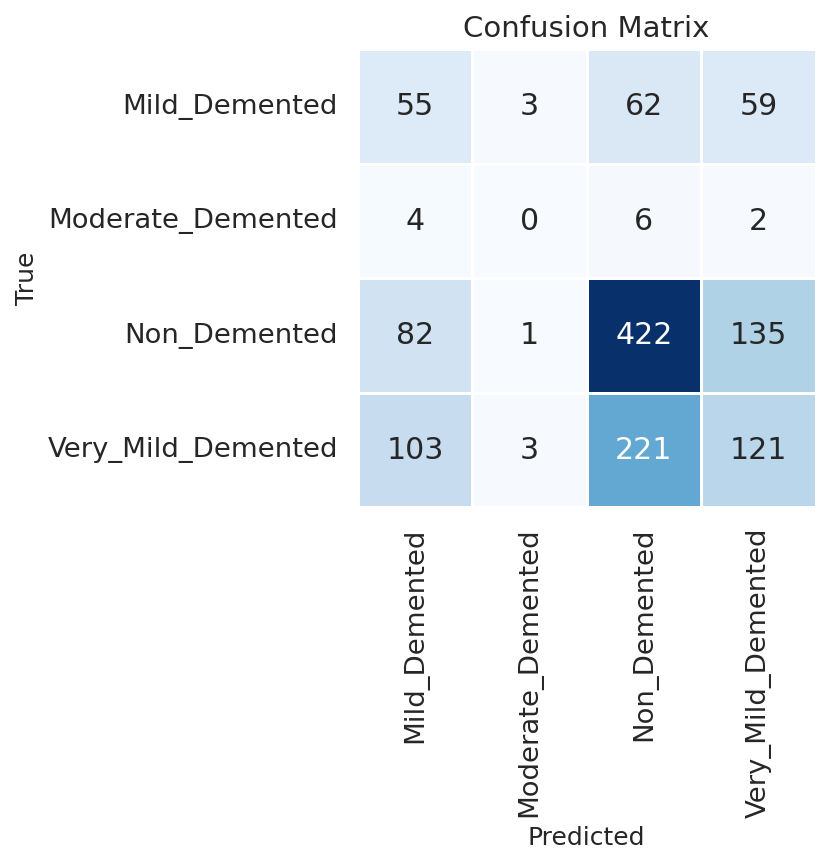

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Increase the default DPI for better resolution
plt.rcParams['figure.dpi'] = 150

# Increase the font size and apply a clean style
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Compute confusion matrix
cm = confusion_matrix(mapped_ytest, y_pred)

# Create a larger figure
plt.figure(figsize=(8, 6))

# Draw a heatmap
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    xticklabels=class_labels,
    yticklabels=class_labels,
    square=True,
    linewidths=0.5,
    cbar=False  # Disable the color bar
)

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


#XGBoost Validation#

In [87]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.3/201.3 MB 2.7 MB/s eta 0:00:00


In [90]:
#Load pre-trained model
model = joblib.load('/content/drive/MyDrive/xgboost.pkl')

import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
# labels in the training data - main_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
# labels in val data {0: 'Very Mild Impairment', 1: 'No Impairment', 2: 'Moderate Impairment', 3: 'Mild Impairment'}
# so mapping is 0 -> 3, 1-> 2, 2-> 1, 3-> 0
mapping = {0: 3, 1: 2, 2: 1, 3: 0}
mapped_ytest = [mapping[x] for x in y_test]

accuracy = accuracy_score(mapped_ytest, y_pred)

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9929632525410477


In [91]:
# Classification report
print(classification_report(mapped_ytest, y_pred, target_names=class_labels))

                    precision    recall  f1-score   support

     Mild_Demented       0.99      0.99      0.99       179
 Moderate_Demented       1.00      0.92      0.96        12
      Non_Demented       0.99      1.00      0.99       640
Very_Mild_Demented       1.00      0.99      0.99       448

          accuracy                           0.99      1279
         macro avg       1.00      0.97      0.98      1279
      weighted avg       0.99      0.99      0.99      1279



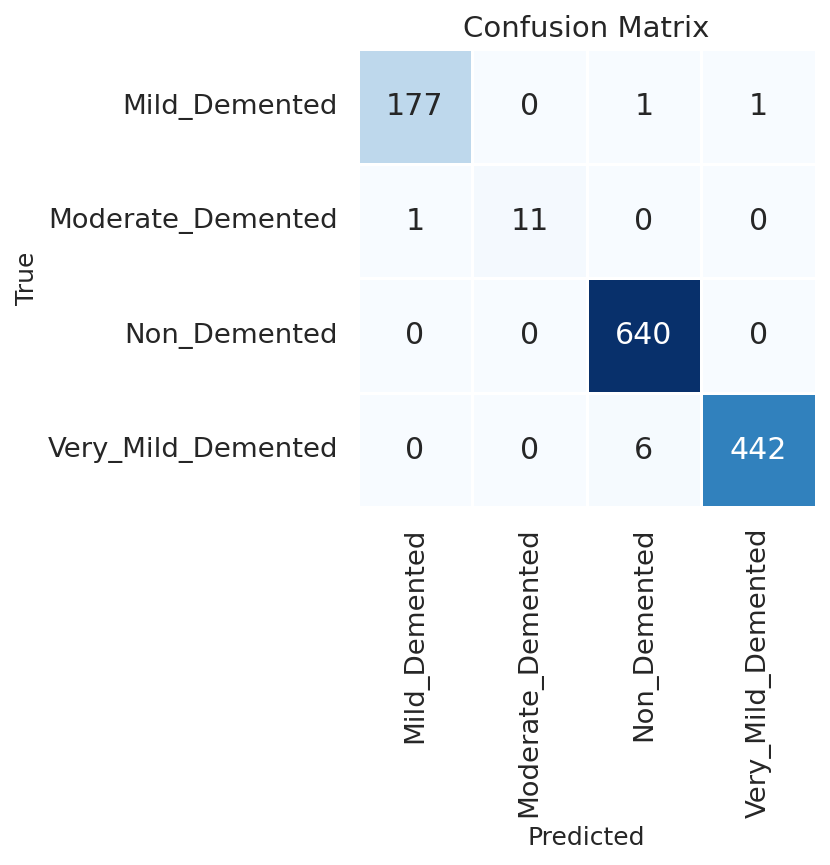

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Increase the default DPI for better resolution
plt.rcParams['figure.dpi'] = 150

# Increase the font size and apply a clean style
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Compute confusion matrix
cm = confusion_matrix(mapped_ytest, y_pred)

# Create a larger figure
plt.figure(figsize=(8, 6))

# Draw a heatmap
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    xticklabels=class_labels,
    yticklabels=class_labels,
    square=True,
    linewidths=0.5,
    cbar=False  # Disable the color bar
)

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


#Random Forest Validation#

In [86]:
#Load pre-trained model
model = joblib.load('/content/drive/MyDrive/rf.pkl')

import numpy as np
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
# labels in the training data - main_labels = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']
# labels in val data {0: 'Very Mild Impairment', 1: 'No Impairment', 2: 'Moderate Impairment', 3: 'Mild Impairment'}
# so mapping is 0 -> 3, 1-> 2, 2-> 1, 3-> 0
mapping = {0: 3, 1: 2, 2: 1, 3: 0}
mapped_ytest = [mapping[x] for x in y_test]

accuracy = accuracy_score(mapped_ytest, y_pred )

print("Test Accuracy:", accuracy)

Test Accuracy: 0.9843627834245504


In [84]:
# Classification report
print(classification_report(mapped_ytest, y_pred, target_names=class_labels))

                    precision    recall  f1-score   support

     Mild_Demented       1.00      0.98      0.99       179
 Moderate_Demented       1.00      0.92      0.96        12
      Non_Demented       0.98      1.00      0.99       640
Very_Mild_Demented       0.99      0.97      0.98       448

          accuracy                           0.98      1279
         macro avg       0.99      0.97      0.98      1279
      weighted avg       0.98      0.98      0.98      1279



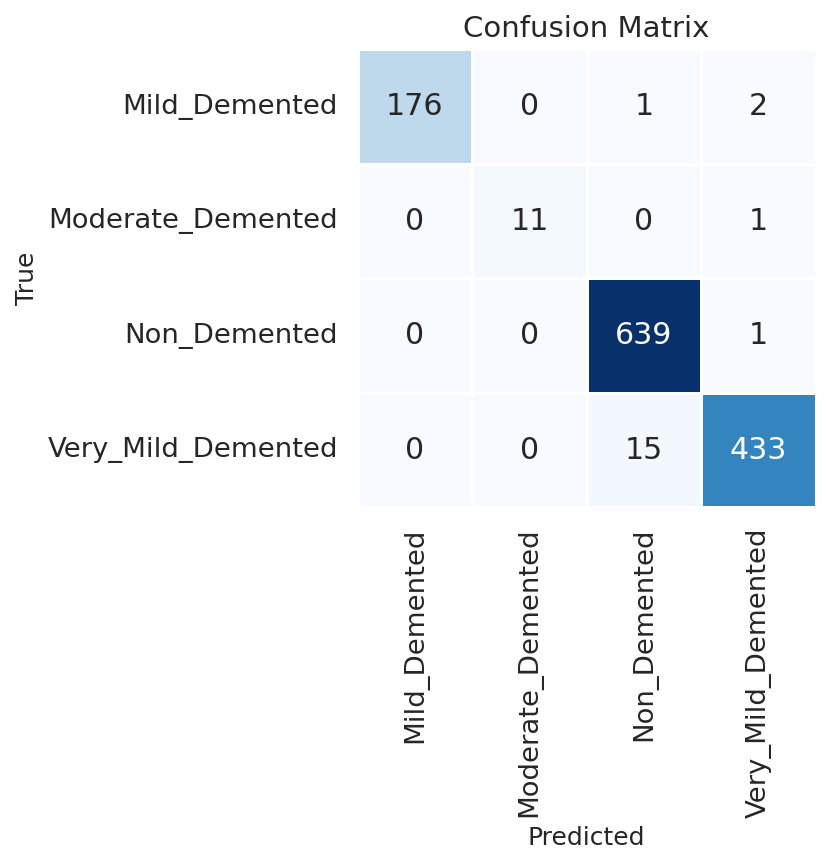

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Increase the default DPI for better resolution
plt.rcParams['figure.dpi'] = 150

# Increase the font size and apply a clean style
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Compute confusion matrix
cm = confusion_matrix(mapped_ytest, y_pred)

# Create a larger figure
plt.figure(figsize=(8, 6))

# Draw a heatmap
sns.heatmap(
    cm,
    annot=True,
    cmap='Blues',
    fmt='g',
    xticklabels=class_labels,
    yticklabels=class_labels,
    square=True,
    linewidths=0.5,
    cbar=False  # Disable the color bar
)

plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.title('Confusion Matrix', fontsize=14)

# Ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()
